# Leptospirosis Detection

## Load train dataset

In [1]:
import pandas as pd
import numpy as np

train_csv = pd.read_csv('train.csv').drop('ID', axis = 1)
train_data = pd.DataFrame(train_csv)

C:\Users\Lasani\AppData\Local\Temp\ipykernel_18576\2849540320.py:4: DtypeWarning: Columns (494,597,599,600,601,603,604) have mixed types. Specify dtype option on import or set low_memory=False.
  train_csv = pd.read_csv('train.csv').drop('ID', axis = 1)


In [2]:
'''#Adjusting display options in the console
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)'''

"#Adjusting display options in the console\npd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)"

## Explore train data

In [3]:
#Get number of rows and columns
train_data.shape

(1387, 805)

In [4]:
#Explore the first few rows of the dataset
train_data.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,Income,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,2018,11,7,1,2,2,2,53,1,35000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2018,1,7,1,2,2,1,17,1,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2018,5,7,1,2,2,1,47,1,40000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2018,1,7,1,2,2,1,21,1,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,2016,8,7,1,2,1,1,99,1,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [5]:
#Get data types of columns
train_data.dtypes

Year                                             int64
Month                                            int64
Hospital                                         int64
Sample                                           int64
ICU                                              int64
                                                ...   
FU_L.interrogansserovarAustralisstr.Ballico    float64
FU_L.interrogansserovarwolfiistr.3705          float64
FU_L.interrogansserovarWeerasinghe             float64
FU_Patoc                                       float64
Final                                            int64
Length: 805, dtype: object

## Handle duplicates

In [6]:
#Check for duplicates
duplicates = train_data.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

Number of duplicate rows:  82


In [7]:
#Remove duplicates
train_data = train_data.drop_duplicates()
print('Records after removing duplicates: ', train_data.shape[0])

Records after removing duplicates:  1305


## Drop unnecessary (repeated) columns

In [8]:
columns_to_drop = ['Education', 'Headache2', 'Headache3', 'Headache4', 'Headache5', 'Headache6', 'Headache7', 'Headache8', 'Headache9', 'Pulserate2', 'Pulserate3', 'Pulserate4', 'Pulserate5', 'Pulserate6', 'Pulserate7', 'Pulserate8', 'Pulserate9', 'SBP2', 'SBP3', 'SBP4', 'SBP5', 'SBP6', 'SBP7', 'SBP8', 'SBP9', 'DBP2', 'DBP3', 'DBP4', 'DBP5', 'DBP6', 'DBP7', 'DBP8', 'DBP9', 'Platelet2', 'Platelet3', 'Platelet4', 'Platelet5', 'Platelet6', 'Platelet7', 'Platelet8', 'Platelet9', 'WBCCount1', 'WBCcount2', 'WBCcount3', 'WBCcount4', 'WBCcount5', 'WBCcount6', 'WBCcount7', 'WBCcount8', 'WBCcount9', 'PulseRhythem', 'Ncount2', 'Ncount3', 'Ncount4', 'Ncount5', 'Ncount6', 'Ncount7', 'Ncount8', 'Ncount9', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'Lcount2', 'Lcount3', 'Lcount4', 'Lcount5', 'Lcount6', 'Lcount7', 'Lcount8', 'Lcount9', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'PCV2', 'PCV3', 'PCV4', 'PCV5', 'PCV6', 'PCV7', 'PCV8', 'PCV9', 'RBC2', 'RBC3', 'RBC4', 'RBC5', 'RBC6', 'RBC7', 'RBC8', 'RBC9', 'CRP2', 'CRP3', 'CRP4', 'CRP5', 'CRP6', 'CRP7', 'CRP8', 'CRP9', 'ESR2', 'ESR3', 'ESR4', 'ESR5', 'ESR6', 'ESR7', 'ESR8', 'ESR9', 'Puscells2', 'Puscells3', 'Puscells4', 'Puscells5', 'Puscells6', 'Puscells7', 'Puscells8', 'Puscells9', 'Redcells2', 'Redcells3', 'Redcells4', 'Redcells5', 'Redcells6', 'Redcells7', 'Redcells8', 'Redcells9', 'Albumin2', 'Albumin3', 'Albumin4', 'Albumin5', 'Albumin6', 'Albumin7', 'Albumin8', 'Albumin9', 'Na2', 'Na3', 'Na4', 'Na5', 'Na6', 'Na7', 'Na8', 'Na9', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'AST2', 'AST3', 'AST4', 'AST5', 'AST6', 'AST7', 'AST8', 'AST9', 'ALT2', 'ALT3', 'ALT4', 'ALT5', 'ALT6', 'ALT7', 'ALT8', 'ALT9', 'T.Bilirub2', 'T.Bilirub3', 'T.Bilirub4', 'T.Bilirub5', 'T.Bilirub6', 'T.Bilirub7', 'T.Bilirub8', 'T.Bilirub9', 'D.Bilirub2', 'D.Bilirub3', 'D.Bilirub4', 'D.Bilirub5', 'D.Bilirub6', 'D.Bilirub7', 'D.Bilirub8', 'D.Bilirub9', 'GT2', 'GT3', 'GT4', 'GT5', 'GT6', 'GT7', 'GT8', 'GT9', 'S.Cr2', 'S.Cr3', 'S.Cr4', 'S.Cr5', 'S.Cr6', 'S.Cr7', 'S.Cr8', 'S.Cr9', 'B.Urea2', 'B.Urea3', 'B.Urea4', 'B.Urea5', 'B.Urea6', 'B.Urea7', 'B.Urea8', 'B.Urea9', 'Year', 'Month', 'Ethnicity', 'Income', 'TertiaryEducation', 'Garbagedisposalprocedure', 'Workplacegarbageaccumilation', 'Workplaceblockeddrainage', 'Workplacesewer', 'Cathome', 'Catworkplace', 'CatNeighbourhood', 'Doghome', 'DogWorkplace', 'DogNeighbourhood', 'CattleNeighbourhood', 'PigHome', 'PigWorkplace', 'PigNeighbourhood', 'GoatHome', 'GoatWorkplace', 'GoatNeighbourhood', 'OtherRhoddentsWorkplace', 'OtherRhodentsNeighbourhood', 'OtherHome', 'OtherWorkplace', 'OtherNeighbourhood', 'wetsoilfrequency', 'wetsoilduration', 'Floodduration', 'Forestfrequency', 'forestduration', 'Bushesfrequency', 'BushesDuration', 'Otheragrifrequency', 'Otheragriduration', 'Gardeningexposure', 'Gardeningfrequency', 'Gardeningduration', 'Otheroutdoorworkexposure', 'Otheroutdoorworkfrequency', 'Otheroutdoorworkduration', 'Naturalrunningfrequency', 'Naturalrunningduration','Stagnantwaterfrequency', 'Stagnantwaterduration', 'Manmaderunningwaterfrequency', 'Manmaderunningwaterduration', 'Drainsduration', 'Otherwaterexposure', 'Otherwaterfrequency', 'Otherwaterduration', 'Paddyfieldduration', 'Newlycultivatedfield', 'Harvestbothmonsoons', 'Sourseofwaterforpaddyfield', 'Fever2', 'Fever3', 'Fever4', 'Fever5', 'Fever6', 'Fever7', 'Fever8', 'Fever9', 'Chills2', 'Chills3', 'Chills4', 'Chills5', 'Chills6', 'Chills7', 'Chills8', 'Chills9', 'Rigors2', 'Rigors3', 'Rigors4', 'Rigors5', 'Rigors6', 'Rigors7', 'Rigors8', 'Rigors9', 'Musclepain2', 'Musclepain3', 'Musclepain4', 'Musclepain5', 'Musclepain6', 'Musclepain7', 'Musclepain8', 'Musclepain9', 'Mustender2', 'Mustender3', 'Mustender4', 'Mustender5', 'Mustender6', 'Mustender7', 'Mustender8', 'Mustender9', 'Nausea2', 'Nausea3', 'Nausea4', 'Nausea5', 'Nausea6', 'Nausea7', 'Nausea8', 'Nausea9', 'Vomiting2', 'Vomiting3', 'Vomiting4', 'Vomiting5', 'Vomiting6', 'Vomiting7', 'Vomiting8', 'Vomiting9', 'Consuf2', 'Consuf3', 'Consuf4', 'Consuf5', 'Consuf6', 'Consuf7', 'Consuf8', 'Consuf9', 'Skinrash2', 'Skinrash3', 'Skinrash4', 'Skinrash5', 'Skinrash6', 'Skinrash7', 'Skinrash8', 'Skinrash9', 'Mucorash2', 'Mucorash3', 'Mucorash4', 'Mucorash5', 'Mucorash6', 'Mucorash7', 'Mucorash8', 'Mucorash9', 'Prostration2', 'Prostration3', 'Prostration4', 'Prostration5', 'Prostration6', 'Prostration7', 'Prostration8', 'Prostration9', 'diarrhea2', 'diarrhea3', 'diarrhea4', 'diarrhea5', 'diarrhea6', 'diarrhea7', 'diarrhea8', 'diarrhea9', 'Oliguria2', 'Oliguria3', 'Oliguria4', 'Oliguria5', 'Oliguria6', 'Oliguria7', 'Oliguria8', 'Oliguria9', 'Anuria2', 'Anuria3', 'Anuria4', 'Anuria5', 'Anuria6', 'Anuria7', 'Anuria8', 'Anuria9', 'Jaundice2', 'Jaundice3', 'Jaundice4', 'Jaundice5',  'Jaundice6', 'Jaundice7', 'Jaundice8', 'Jaundice9', 'hepatictender2',  'hepatictender3', 'hepatictender4', 'hepatictender5', 'hepatictender6', 'hepatictender7', 'hepatictender8', 'hepatictender9', 'hepatomegaly2', 'hepatomegaly3', 'hepatomegaly4', 'hepatomegaly5', 'hepatomegaly6', 'hepatomegaly7', 'hepatomegaly8', 'hepatomegaly9', 'Spleenomegaly2', 'Spleenomegaly3', 'Spleenomegaly4', 'Spleenomegaly5', 'Spleenomegaly6', 'Spleenomegaly7', 'Spleenomegaly8', 'Spleenomegaly9', 'Lymphadenopathy2', 'Lymphadenopathy3', 'Lymphadenopathy4', 'Lymphadenopathy5', 'Lymphadenopathy6', 'Lymphadenopathy7', 'Lymphadenopathy8', 'Lymphadenopathy9', 'Photophobia2', 'Photophobia3', 'Photophobia4', 'Photophobia5', 'Photophobia6', 'Photophobia7', 'Photophobia8', 'Photophobia9', 'Neckstiffness2', 'Neckstiffness3', 'Neckstiffness4', 'Neckstiffness5', 'Neckstiffness6', 'Neckstiffness7', 'Neckstiffness8', 'Neckstiffness9', 'Confusion2', 'Confusion3', 'Confusion4', 'Confusion5', 'Confusion6', 'Confusion7', 'Confusion8', 'Confusion9', 'Cough2', 'Cough3', 'Cough4', 'Cough5', 'Cough6', 'Cough7', 'Cough8', 'Cough9', 'Haemoptysis2', 'Haemoptysis3', 'Haemoptysis4', 'Haemoptysis5', 'Haemoptysis6', 'Haemoptysis7', 'Haemoptysis8', 'Haemoptysis9', 'SOB2', 'SOB3', 'SOB4', 'SOB5', 'SOB6', 'SOB7', 'SOB8', 'SOB9', 'Chestpain2', 'Chestpain3', 'Chestpain4', 'Chestpain5', 'Chestpain6', 'Chestpain7', 'Chestpain8', 'Chestpain9', 'Bleeding2', 'Bleeding3', 'Bleeding4', 'Bleeding5', 'Bleeding6', 'Bleeding7', 'Bleeding8', 'Bleeding9', 'X.GT', 'PulseRhythem', 'WBC_first_day','S.amylase2', 'S.amylase3', 'S.amylase4', 'S.amylase5', 'S.amylase6', 'S.amylase7', 'S.amylase8', 'S.amylase9', 'S.phosphate2', 'S.phosphate3', 'S.phosphate4', 'S.phosphate5', 'S.phosphate6', 'S.phosphate7', 'S.phosphate8', 'S.phosphate9', 'ALP2', 'ALP3', 'ALP4', 'ALP5', 'ALP6', 'ALP7', 'ALP8', 'ALP9', 'MAT_set_1', 'Pomona', 'Bratislava', 'Canicola', 'Icterohaemorrhagiae', 'Mankarso', 'Georgia', 'Pyrogene', 'Bataviae', 'Wolfii', 'Geyaweera', 'Weerasinghe', 'Ceylonica', 'Alice', 'Patoc', 'Autumnalis', 'Alex', 'Ballum', 'Djasiman', 'Australis', 'Tarassovi', 'Ratnapura', 'Borincana', 'Celledoni', 'Grippotyphosa', 'PomonaF', 'BratislavaF', 'CanicolaF', 'IcterohaemorrhagiaeF', 'MankarsoF', 'GeorgiaF', 'PyrogeneF', 'BataviaeF', 'WolfiiF',    'GeyaweeraF', 'WeerasingheF', 'CeylonicaF', 'AliceF', 'PatocF', 'AutumnalisF', 'AlexF', 'BallumF', 'DjasimanF', 'AustralisF', 'TarassoviF', 'RatnapuraF', 'BorincanaF', 'CelledoniF', 'GrippotyphosaF', 'Acu_L.interrogansserovarBratislavastr.JezBratislava', 'Acu_L.interrogansserovarAutumnalisstr.AkiyamiA', 'Acu_L.weiliiserovarCelledonistr.Celledoni', 'Acu_L.interrogansserovarCanicolastr.Ruebush', 'Acu_L.interrogansserovarIcterohaemorrhagiaestr.RGA', 'Acu_L.interrogansserovarMankarsostr.Mankarso', 'Acu_L.santarosaiserovarGeorgiastr.LT117', 'Acu_L.santarosaiserovarPyrogenesstr.Salinem', 'Acu_L.interrogansserovarBataviaestr.VanTienan', 'Acu_L.interrogansserovarAlexistr.616', 'Acu_L.interrogansserovarAustralisstr.Ballico', 'Acu_L.interrogansserovarwolfiistr.3705', 'Acu_L.interrogansserovarWeerasinghe', 'Acu_Patoc', 'FU_L.interrogansserovarBratislavastr.JezBratislava', 'FU_L.interrogansserovarAutumnalisstr.AkiyamiA', 'FU_L.weiliiserovarCelledonistr.Celledoni', 'FU_L.interrogansserovarCanicolastr.Ruebush', 'FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA', 'FU_L.interrogansserovarMankarsostr.Mankarso', 'FU_L.santarosaiserovarGeorgiastr.LT117', 'FU_L.santarosaiserovarPyrogenesstr.Salinem', 'FU_L.interrogansserovarBataviaestr.VanTienan', 'FU_L.interrogansserovarAlexistr.616', 'FU_L.interrogansserovarAustralisstr.Ballico', 'FU_L.interrogansserovarwolfiistr.3705', 'FU_L.interrogansserovarWeerasinghe', 'FU_Patoc']
train_data.drop(columns = columns_to_drop, inplace = True)
train_data.shape

(1305, 219)

## Replace vague values of numerical columns

In [9]:
#Replace values starting with 'fiel' or 'occ' with 99
train_data = train_data.map(lambda x: 99 if isinstance(x, str) and (x.lower().startswith('fiel') or x.lower().startswith('occ')) else x)
print(train_data)

      Hospital  Sample  ICU  OPD  Sex  Age  Prophylactics  Pasttreatments  \
0            7       1    2    2    2   53              3               1   
1            7       1    2    2    1   17              2               1   
2            7       1    2    2    1   47              2               1   
3            7       1    2    2    1   21              2               1   
4            7       1    2    1    1   99              2               1   
...        ...     ...  ...  ...  ...  ...            ...             ...   
1382         4       2    2    2    1   62             99              99   
1383         7       1    2    2    2   59              2               1   
1384         5       1    2    1    1   56              2               1   
1385         4       2    2    2    1   61             99              99   
1386         8       1    2    2    1   36              2               1   

      Pastantibiotics  Chronicillness  ...  S.amylase10  S.phosphate10  ALP

## Drop missing values of more than 80%

In [10]:
#Convert values called '99' to missing values as in the description
train_data.replace(99, pd.NA, inplace = True)
train_data.replace('99', pd.NA, inplace = True)

print(train_data.head())

   Hospital  Sample ICU OPD Sex   Age Prophylactics Pasttreatments  \
0         7       1   2   2   2    53             3              1   
1         7       1   2   2   1    17             2              1   
2         7       1   2   2   1    47             2              1   
3         7       1   2   2   1    21             2              1   
4         7       1   2   1   1  <NA>             2              1   

  Pastantibiotics Chronicillness  ... S.amylase10 S.phosphate10 ALP10  \
0               1              2  ...        <NA>          <NA>  <NA>   
1               1              2  ...        <NA>          <NA>  <NA>   
2               2              2  ...        <NA>          <NA>  <NA>   
3               1              2  ...        <NA>          <NA>  <NA>   
4               3           <NA>  ...        <NA>          <NA>  <NA>   

  WPqPCRDiagnosis UrineqPCRDiagnosis CultureqPCRDia SerumqPCRDiagnosis  \
0               3               <NA>           <NA>               

In [11]:
#Identify missing value counts
missing_counts = train_data.isnull().sum()
print(missing_counts)

Hospital                 0
Sample                   0
ICU                     20
OPD                     20
Sex                     67
                      ... 
CultureqPCRDia        1040
SerumqPCRDiagnosis    1023
UFqPCRDiag            1147
Isolate                  0
Final                    0
Length: 219, dtype: int64


In [12]:
#Drop columns with too many missing values
missing_percentages = missing_counts / len(train_data)
threshold = 0.85 
columns_to_drop = missing_percentages[missing_percentages > threshold].index
train_data.drop(columns = columns_to_drop, inplace = True)

#Verification
train_data.shape

(1305, 176)

## Divide variables into categorical and numerical

In [13]:
#Group variables into categorical and numerical by defining a threshold value for number of unique values in each column
categorical_vars = []
numerical_vars = []
unique_threshold = 12
    
for column in train_data.columns:
    unique_count = train_data[column].nunique()
    if unique_count <= unique_threshold:
        categorical_vars.append(column)        
    else:
        numerical_vars.append(column)        

In [14]:
#Adjust after manually going through variable data types
categorical_vars.remove('Puscells')
numerical_vars.append('Puscells')

print("After manual adjustment:")
print("Categorical variables:", categorical_vars, "\n")
print("Numerical variables:", numerical_vars)

After manual adjustment:
Categorical variables: ['Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Prophylactics', 'Pasttreatments', 'Pastantibiotics', 'Chronicillness', 'Possibleexposure', 'Usualdrinkingwatersource', 'Usualbathingwatersource', 'Sourceofwaterforhousehold', 'Accumilationofrefusal', 'Availabilityofpublicgarbagecollectionprocedure', 'HomeStreamrivercanaloranyotherrunningwatersource', 'WorkplaceStreamrivercanaloranyotherrunningwatersource', 'Homepondlaketankoranyotherstagnantwatersource', 'WorkPlacepondlaketankoranyotherstagnantwatersource', 'Homemarshywetland', 'Workplacemarshywet', 'HomeBushes', 'Workplacebushes', 'Homeforest', 'Workplaceforest', 'Homeworkingpaddyfield', 'WorkPlaceworkingpaddyfield', 'Homeabondantpaddyfield', 'Workplaceabondantpaddyfield', 'Homeotheragricultural', 'workplaceotheragricultural', 'Homeanimalfarm', 'Workplaceanimalfarm', 'Homegarbageaccumilation', 'Homeblockeddrainage', 'Homesewer', 'Rathome', 'RatWorkplace', 'RatNeighbourhood', 'Cattlehome', 'Cat

In [15]:
#Adjust data types in numerical columns
train_data[numerical_vars] = train_data[numerical_vars].apply(pd.to_numeric, errors = 'coerce')

#Verify data types
train_data.dtypes

Hospital               int64
Sample                 int64
ICU                   object
OPD                   object
Sex                   object
                       ...  
UrineqPCRDiagnosis    object
CultureqPCRDia        object
SerumqPCRDiagnosis    object
Isolate                int64
Final                  int64
Length: 176, dtype: object

## Drop highly correlated numerical columns

In [16]:
#Identify highly correlated numerical columns
corr_matrix = train_data[numerical_vars].corr()
#Apply a threshold to get the most correlated ones
threshold = 0.8
highly_correlated = corr_matrix.abs() > threshold
highly_correlated_columns = highly_correlated.any(axis = 0)

#Determine highly correlated pairs
correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Highly correlated column pairs:")
print(correlated_pairs)

Highly correlated column pairs:
[('SBPadd', 'DBPadd'), ('AST', 'ALT'), ('T.Bilirubin', 'D.Bilirubin')]


In [17]:
#Drop one of highly correlated variables from pairs to avoid multicolinearity
train_data = train_data.drop(columns = ['DBPadd', 'ALT', 'D.Bilirubin'])

numerical_vars.remove('DBPadd')
numerical_vars.remove('ALT')
numerical_vars.remove('D.Bilirubin')

train_data.shape

(1305, 173)

## Check for outliers through boxplots in numerical data

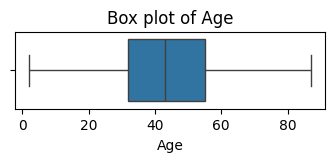

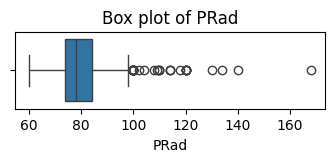

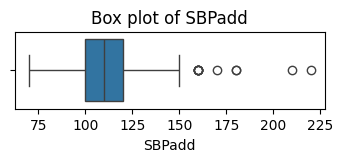

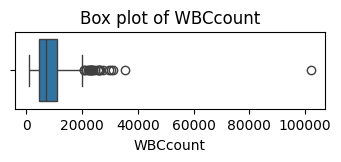

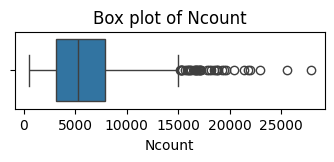

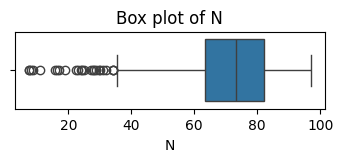

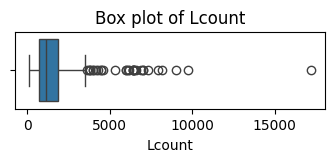

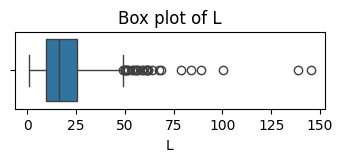

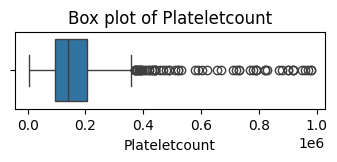

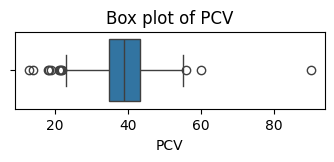

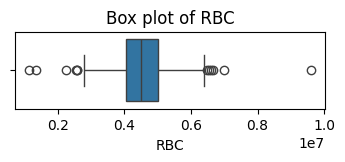

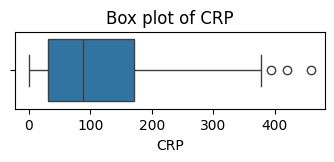

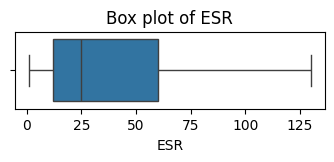

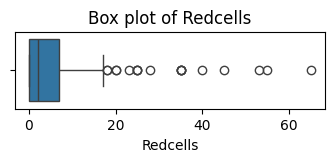

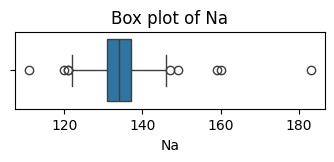

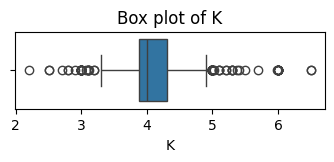

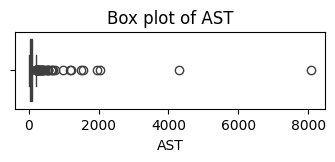

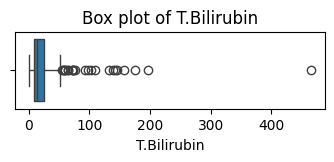

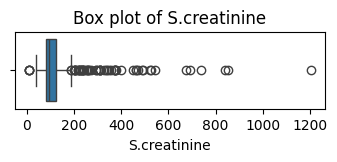

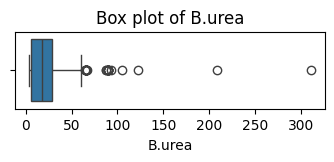

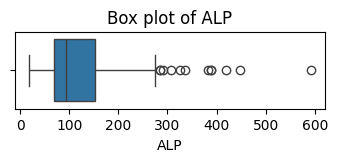

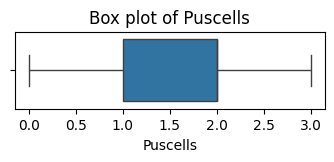

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_vars:
    plt.figure(figsize = (4, 1))
    sns.boxplot(x = train_data[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

#Detecting heavy outliers in most of the columns

## Impute numerical variables

In [19]:
#With median
for col in numerical_vars:
    if train_data[col].isnull().sum() > 0:
        median_val = train_data[col].median()
        train_data[col].fillna(median_val, inplace = True)

## Perform robust scaling on numerical data

In [20]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_data[numerical_vars] = scaler.fit_transform(train_data[numerical_vars])
train_data[numerical_vars] = pd.DataFrame(train_data[numerical_vars], columns = numerical_vars)
train_data[numerical_vars]

,Age,PRad,SBPadd,WBCcount,Ncount,N,Lcount,L,Plateletcount,PCV,...,ESR,Redcells,Na,K,AST,T.Bilirubin,S.creatinine,B.urea,ALP,Puscells
0,0.476190,8.0,10.0,1.670487,4.675926,1.201724,3.878505,-0.286085,-0.964286,-8.60,...,0.0,0.0,-1.0,-0.8,5.0,25.3,197.0,4.2,114.0,0.0
1,-1.238095,-2.0,0.0,-1.289398,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.190476,10.0,-10.0,0.226361,0.712963,0.453955,0.000000,-0.469785,-1.250000,-1.70,...,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.047619,0.0,0.0,-0.744986,-2.925926,-5.645010,4.018692,5.834799,-0.821429,-1.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.904762,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1383,0.761905,22.0,-6.0,-0.309456,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1384,0.619048,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1385,0.857143,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA on numerical data

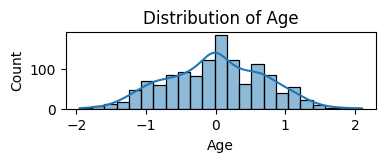

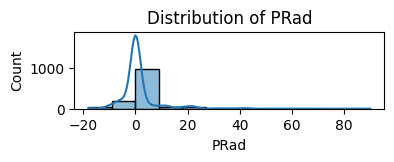

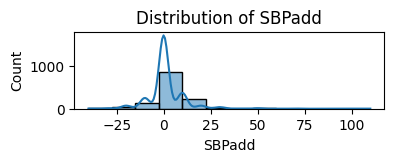

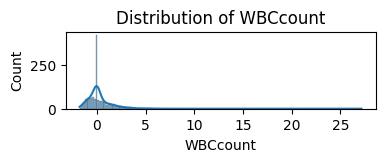

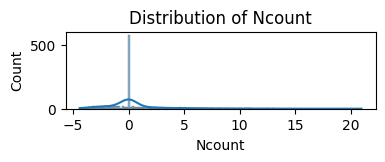

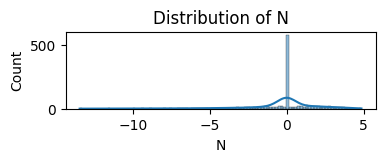

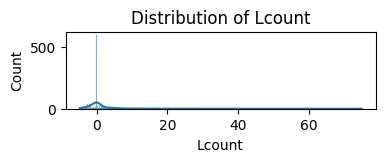

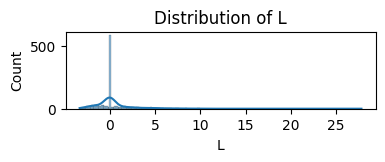

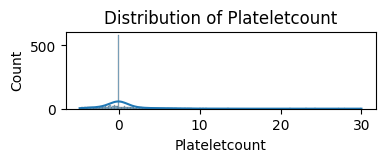

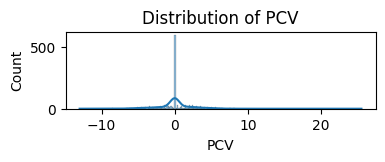

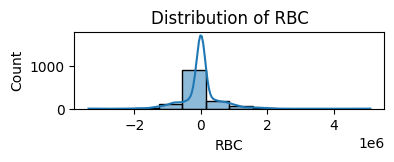

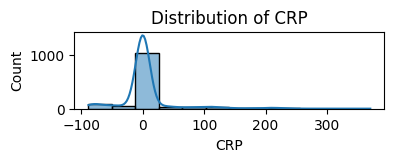

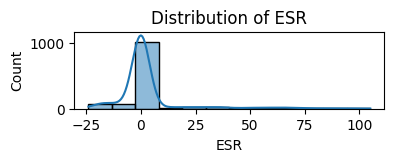

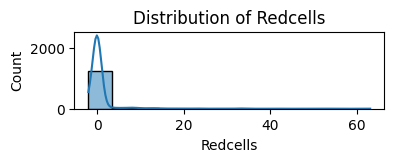

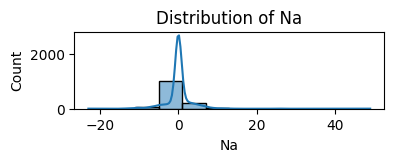

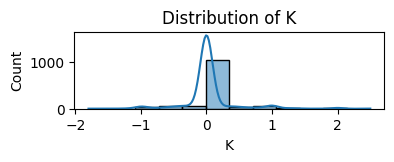

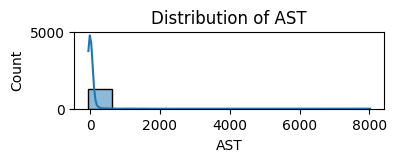

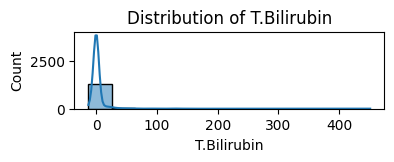

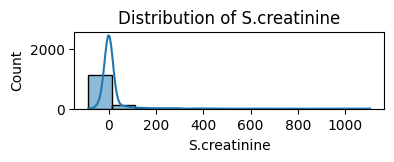

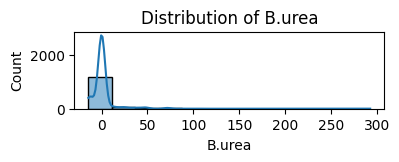

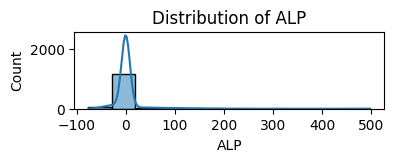

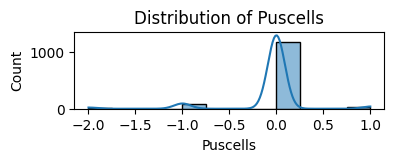

In [21]:
for column in train_data[numerical_vars]:
    plt.figure(figsize = (4, 1))
    sns.histplot(train_data[column], kde = True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Impute categorical variables

In [22]:
#With mode
for col in categorical_vars:
    train_data[col].fillna(train_data[col].mode()[0], inplace = True)

In [23]:
#Verification
print(train_data.isnull().sum())

Hospital              0
Sample                0
ICU                   0
OPD                   0
Sex                   0
                     ..
UrineqPCRDiagnosis    0
CultureqPCRDia        0
SerumqPCRDiagnosis    0
Isolate               0
Final                 0
Length: 173, dtype: int64


## EDA on categorical data

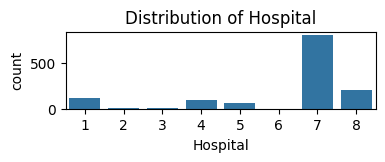

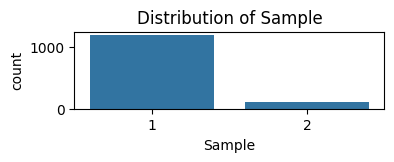

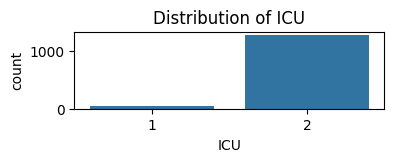

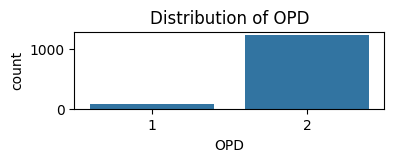

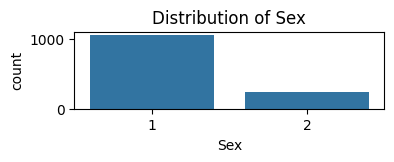

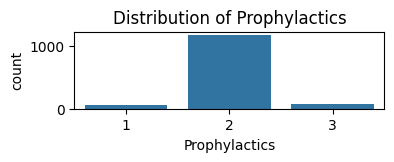

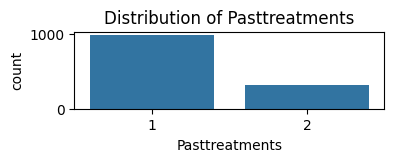

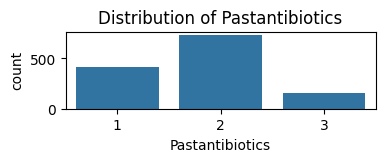

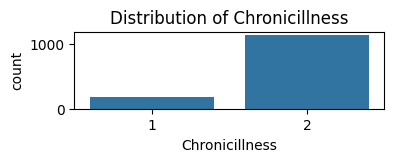

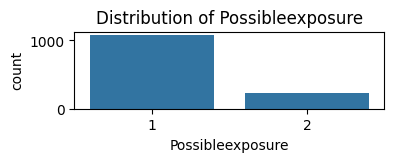

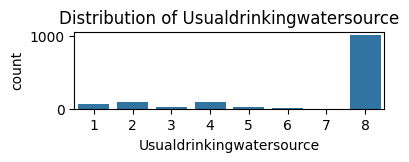

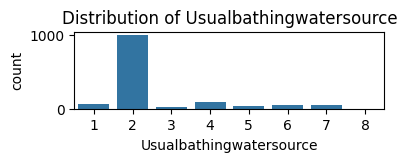

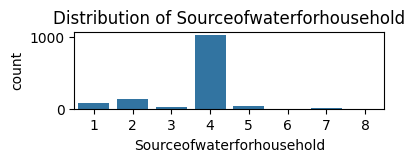

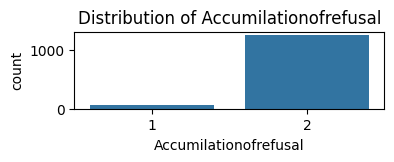

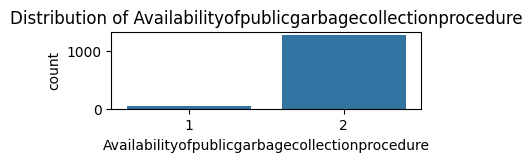

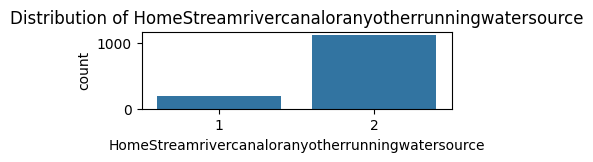

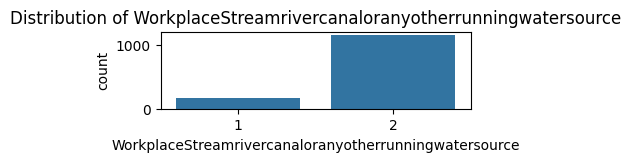

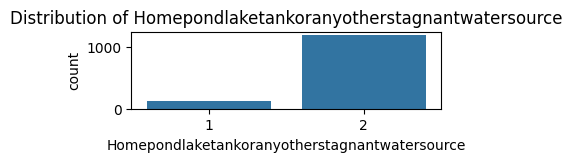

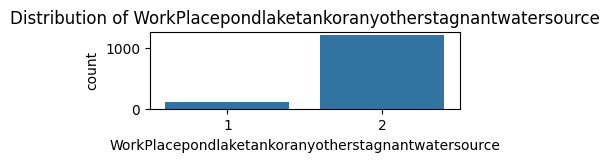

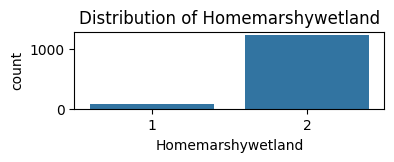

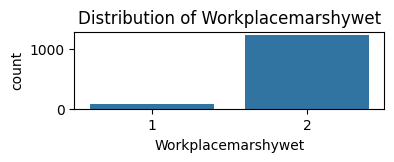

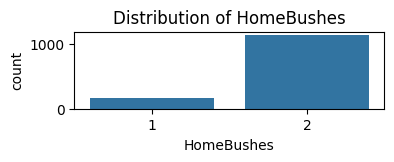

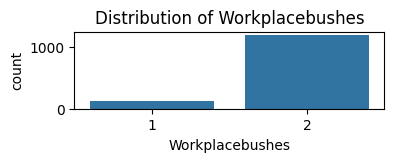

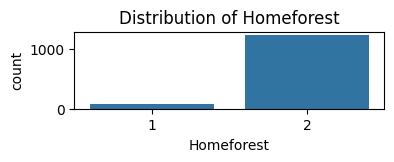

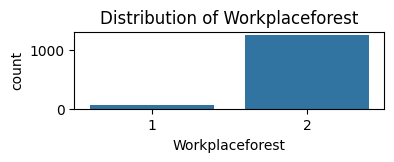

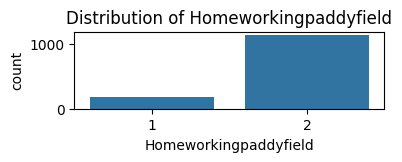

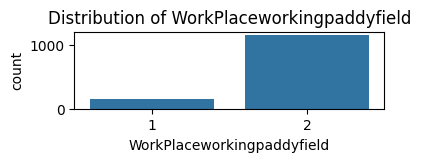

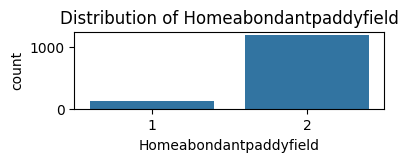

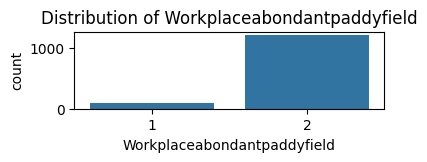

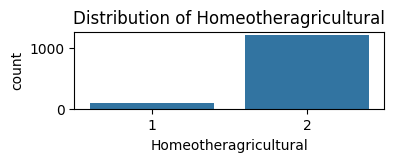

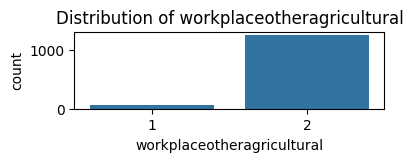

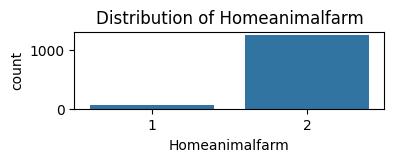

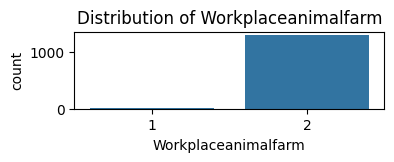

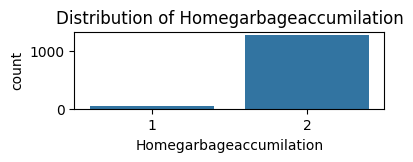

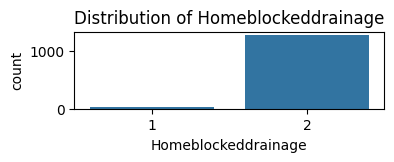

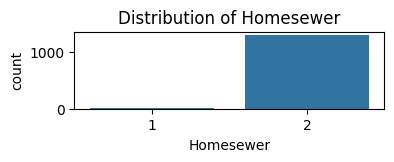

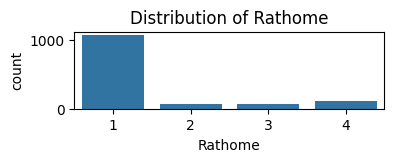

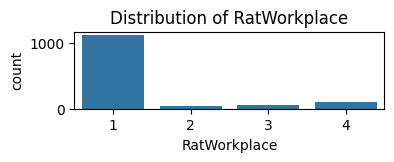

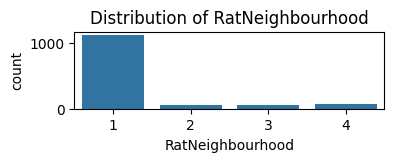

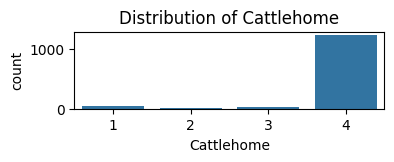

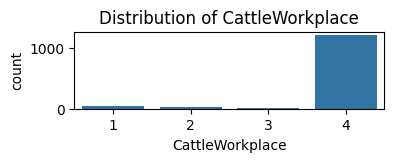

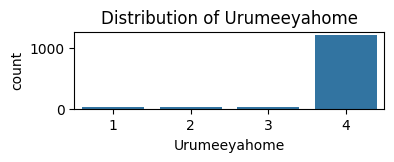

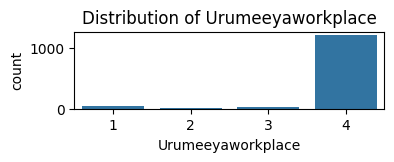

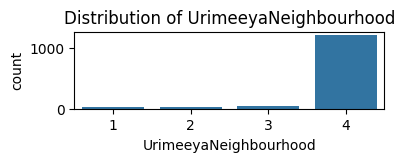

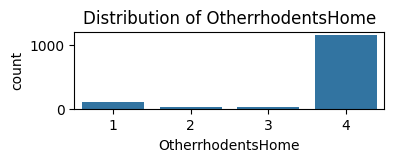

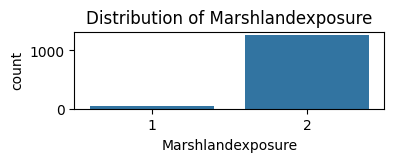

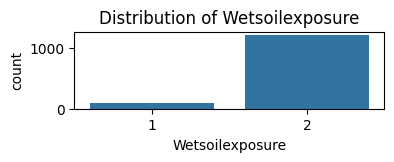

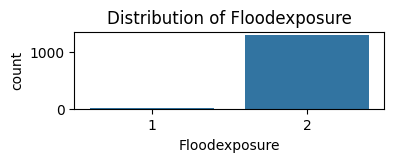

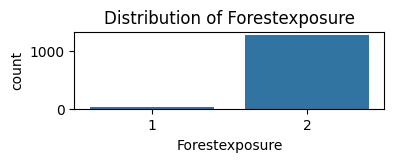

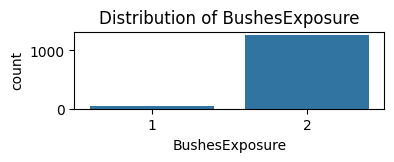

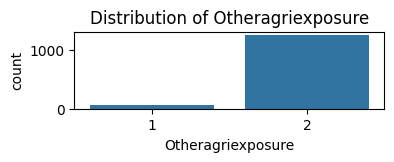

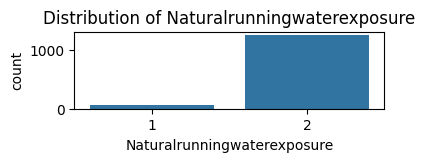

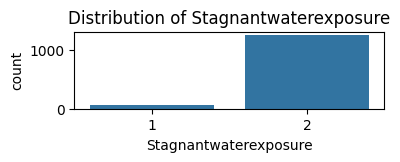

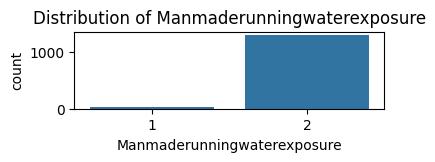

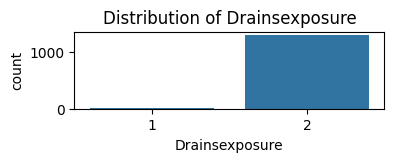

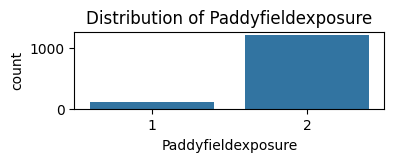

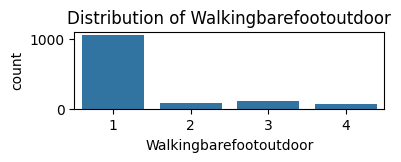

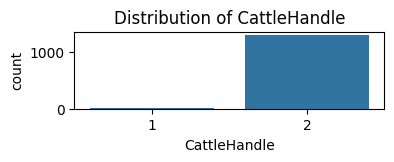

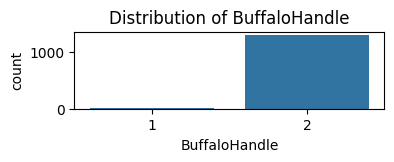

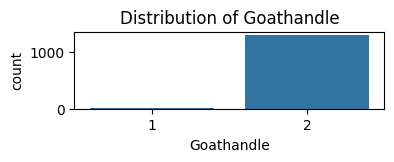

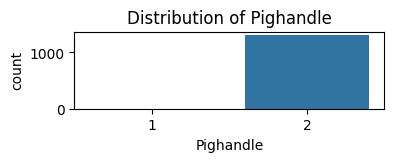

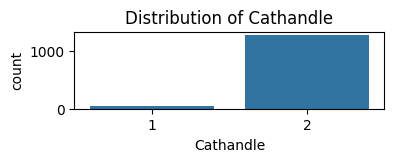

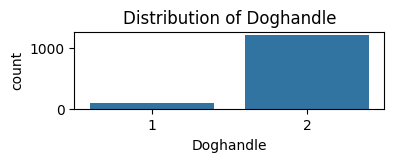

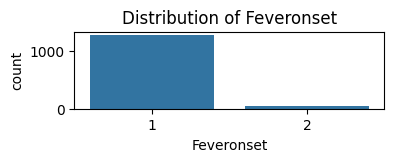

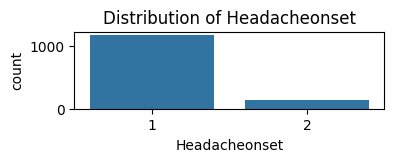

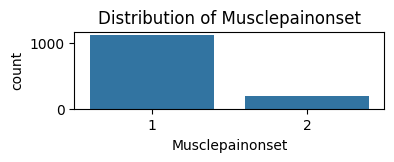

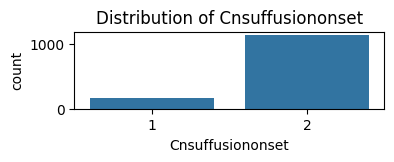

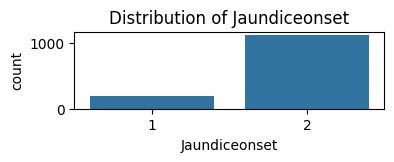

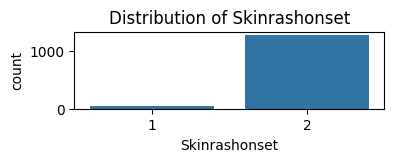

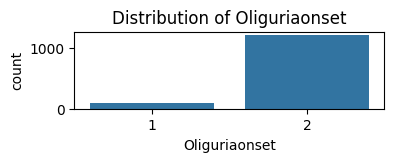

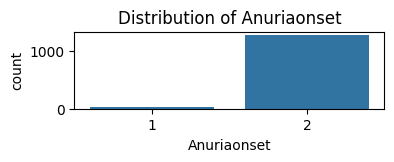

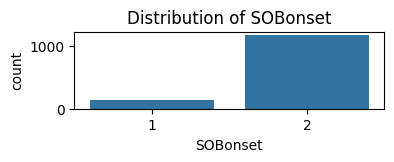

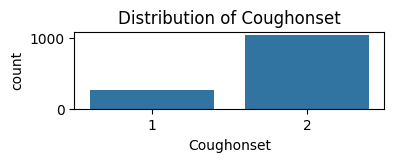

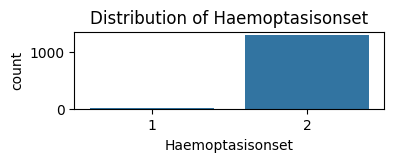

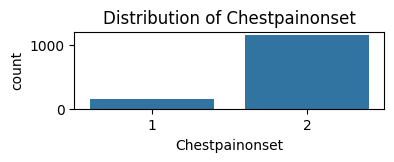

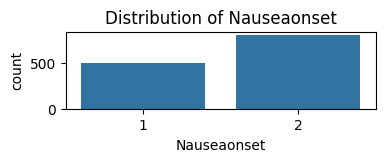

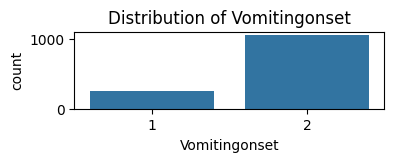

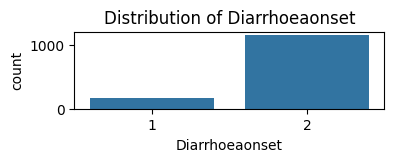

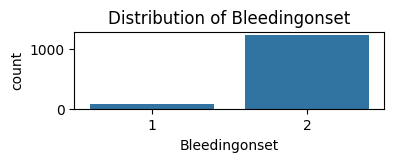

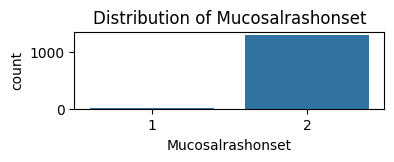

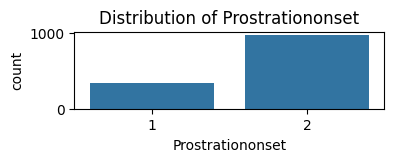

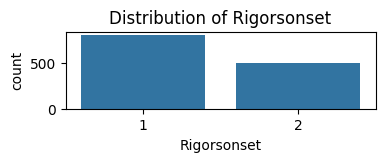

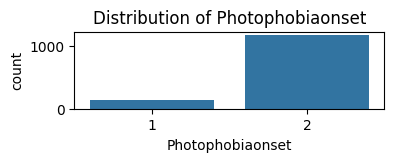

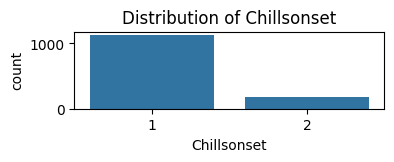

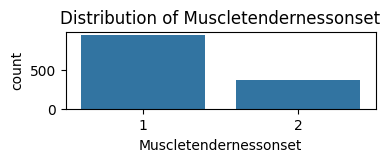

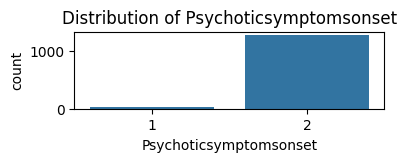

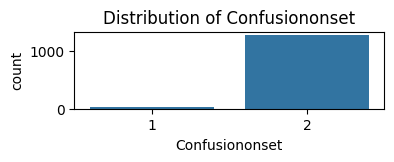

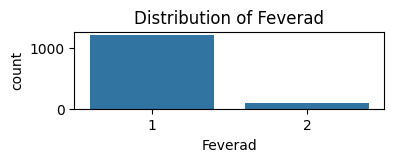

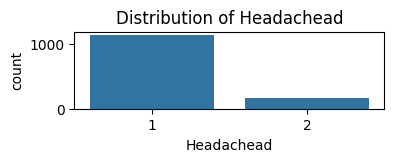

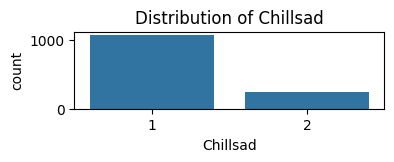

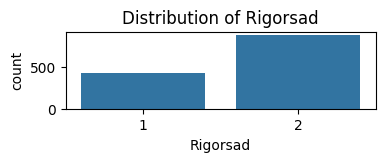

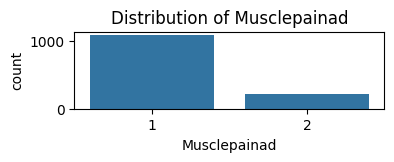

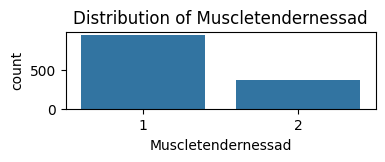

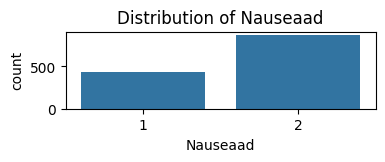

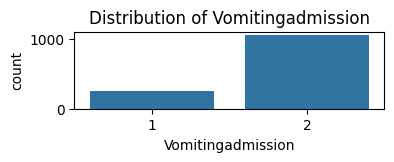

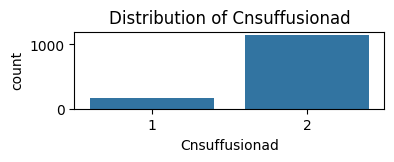

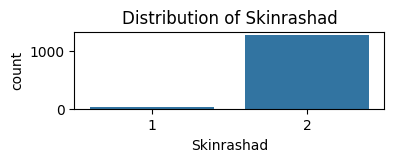

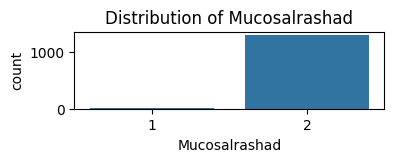

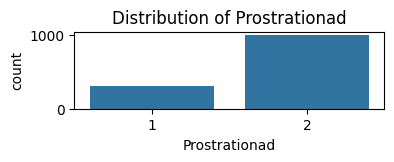

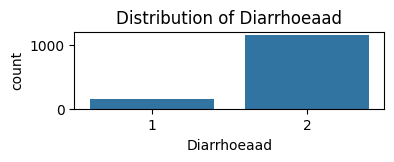

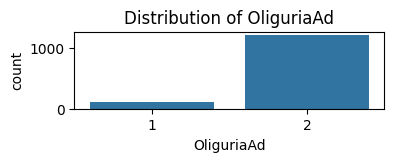

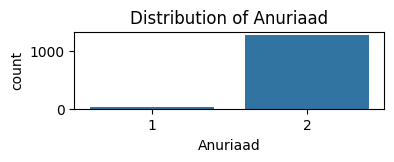

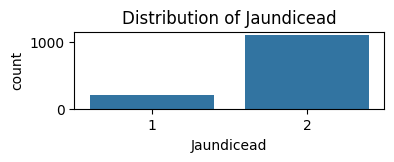

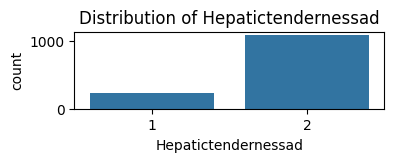

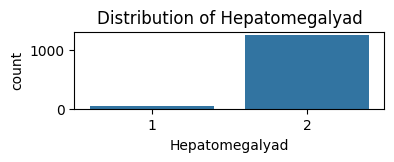

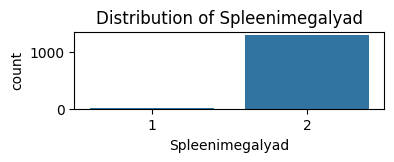

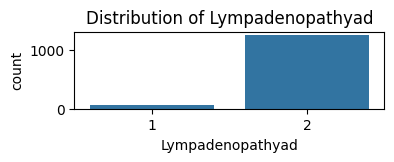

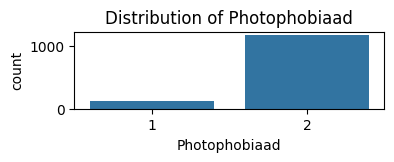

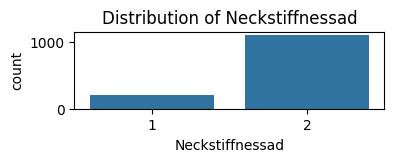

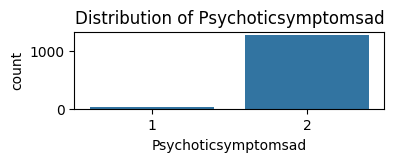

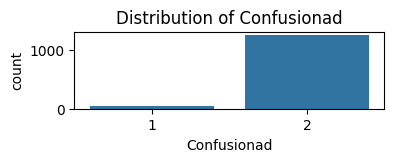

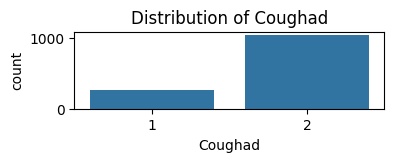

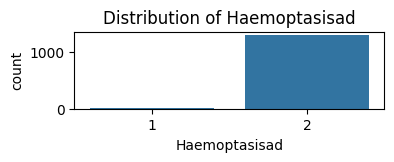

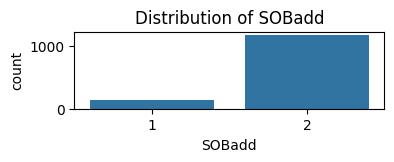

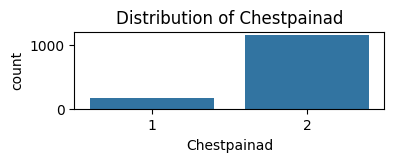

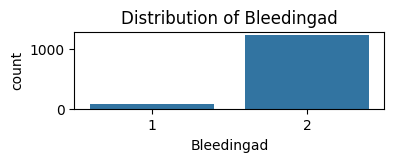

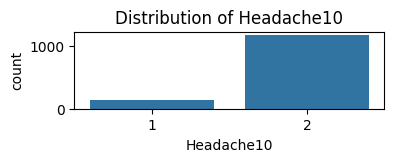

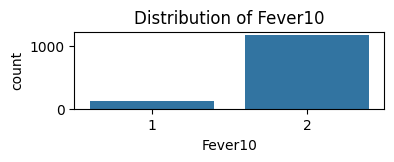

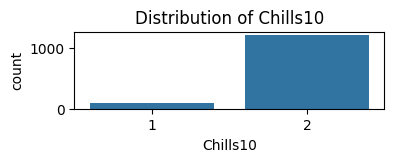

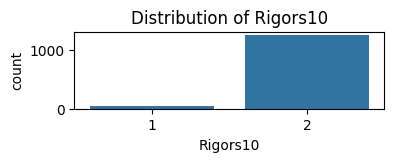

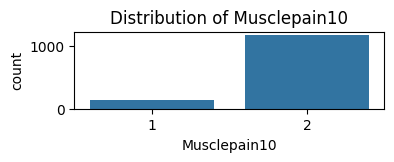

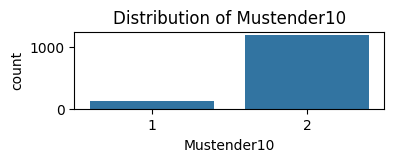

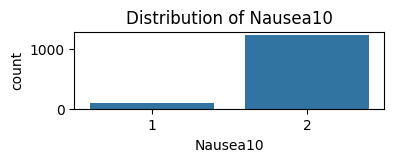

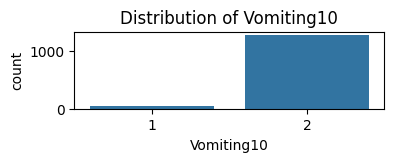

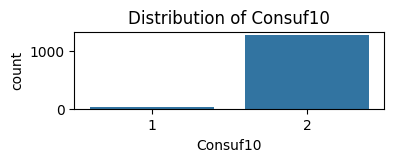

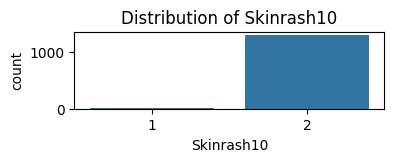

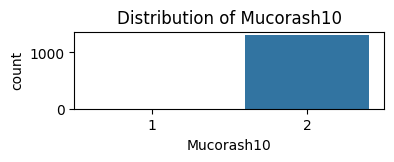

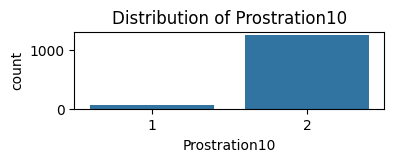

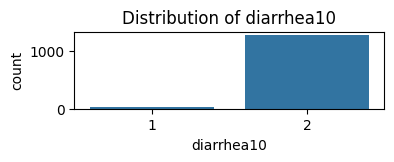

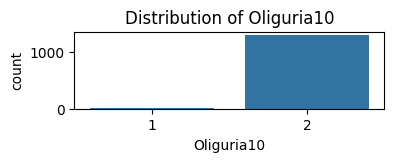

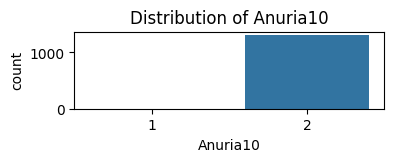

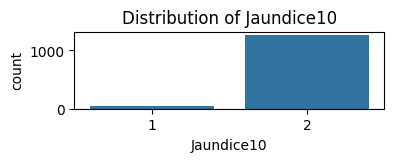

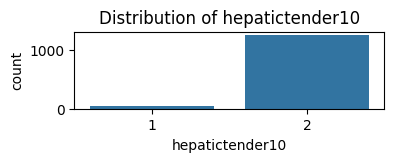

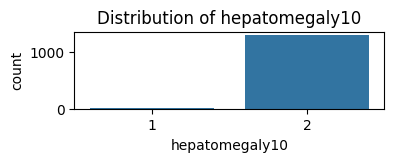

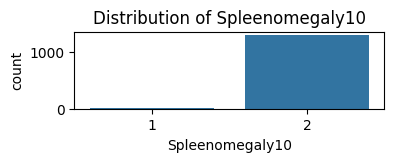

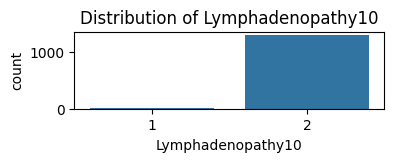

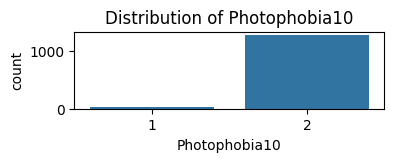

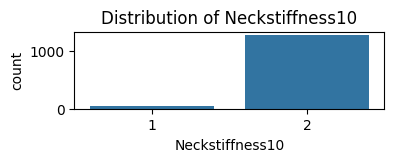

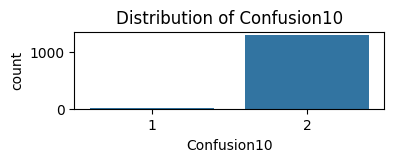

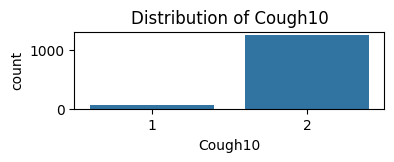

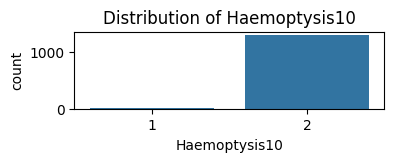

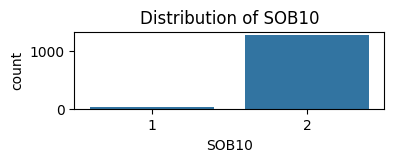

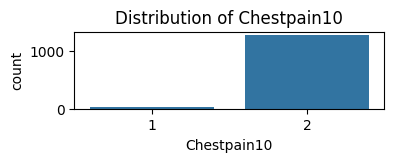

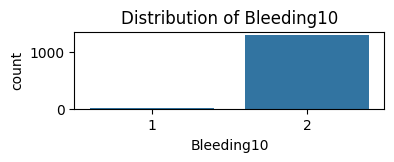

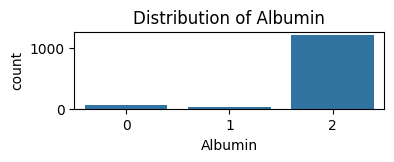

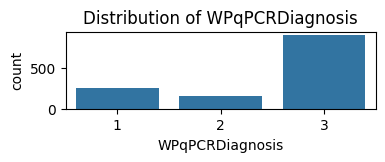

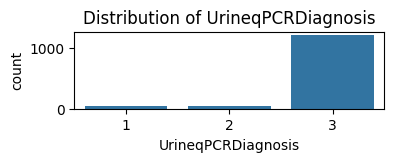

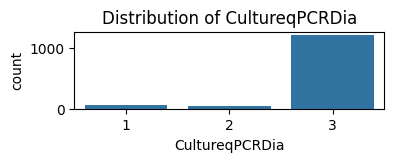

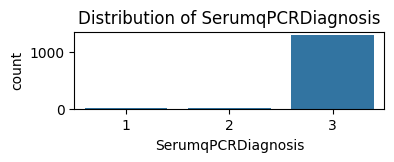

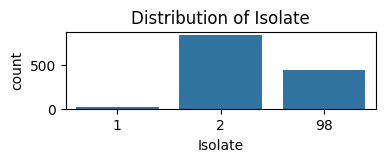

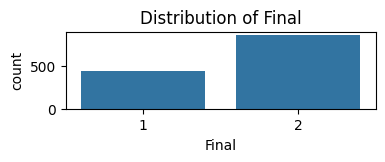

In [24]:
for column in categorical_vars:
    plt.figure(figsize = (4, 1))
    sns.countplot(x = train_data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

## Perform SMOTE on 'Final' variable

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Split train data into X and y
X_train = train_data.drop('Final', axis = 1)
y_train = train_data['Final']

smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("SMOTE class distribution:", Counter(y_train))

SMOTE class distribution: Counter({2: 861, 1: 861})


## Train Random Forest Classifier model 

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Perform hyperparameter tuning with cross-validation

In [27]:
from sklearn.model_selection import GridSearchCV

#Define hyperparameters
param_grid = {
    'n_estimators': [173, 174, 175],
    'max_depth': [22, 23, 24],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2]
}

#Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv = 10, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Best Score: 0.9251713940045704
Best Parameters: {'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 174}


## Predict model on train data

In [28]:
y_pred_train = best_model.predict(X_train)

## Check accuracy for train data predictions

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy: ", accuracy_train)

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: \n", conf_matrix_train)

class_report_train = classification_report(y_train, y_pred_train)
print("Classification Report: \n", class_report_train)

Accuracy:  0.9814169570267132
Confusion Matrix: 
 [[829  32]
 [  0 861]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98       861
           2       0.96      1.00      0.98       861

    accuracy                           0.98      1722
   macro avg       0.98      0.98      0.98      1722
weighted avg       0.98      0.98      0.98      1722



## Split the train dataset itelf into train and validation sets

In [30]:
from sklearn.model_selection import train_test_split

X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

## Perform SMOTE on train and validation sets again

In [31]:
X_train_tr, y_train_tr = smote.fit_resample(X_train_tr, y_train_tr)

print("Train-SMOTE class distribution", Counter(y_train_tr))

Train-SMOTE class distribution Counter({1: 697, 2: 697})


In [32]:
X_train_tr.shape

(1394, 172)

## Train RF inside train dataset¶

In [33]:
rf.fit(X_train_tr, y_train_tr)

RandomForestClassifier(random_state=42)

## Perform hyperparameter tuning with CV inside train dataset

In [34]:
grid_search_tr = GridSearchCV(rf, param_grid, cv = 10, n_jobs =-1, scoring = 'accuracy')
grid_search_tr.fit(X_train_tr, y_train_tr)

best_score_tr = grid_search_tr.best_score_
best_params_tr = grid_search_tr.best_params_
best_model_tr = grid_search_tr.best_estimator_

print("Best Score:", best_score_tr)
print("Best Parameters:", best_params_tr)

Best Score: 0.9239928057553957
Best Parameters: {'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 174}


## Predict model inside train dataset

In [35]:
y_pred_train_tr = best_model_tr.predict(X_train_tr)

## Check accuracy for train data predictions inside train dataset

In [36]:
accuracy_train_tr = accuracy_score(y_train_tr, y_pred_train_tr)
print("Accuracy: ", accuracy_train_tr)
conf_matrix_train_tr = confusion_matrix(y_train_tr, y_pred_train_tr)
print("Confusion Matrix: \n", conf_matrix_train_tr)
class_report_train_tr = classification_report(y_train_tr, y_pred_train_tr)
print("Classification Report: \n", class_report_train_tr)

Accuracy:  0.9827833572453372
Confusion Matrix: 
 [[673  24]
 [  0 697]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.97      0.98       697
           2       0.97      1.00      0.98       697

    accuracy                           0.98      1394
   macro avg       0.98      0.98      0.98      1394
weighted avg       0.98      0.98      0.98      1394



## Load test dataset

In [37]:
test_data_whole = pd.read_csv('test.csv').drop('ID', axis = 1)

#Get train dataset categorical columns without 'Final' variable
categorical_vars_filtered = [col for col in categorical_vars if col != 'Final']

#Get columns for test data that are included in train data after preprocessing
test_data = test_data_whole[categorical_vars_filtered + numerical_vars]
print(test_data.shape)

(347, 172)


## Preprocess test data into train data format

In [38]:
#Handle duplicates
test_data = test_data.drop_duplicates()

In [39]:
#Replace values starting with 'fiel' or 'occ' with 99
test_data = test_data.map(lambda x: 99 if isinstance(x, str) and (x.lower().startswith('fiel') or x.lower().startswith('occ')) else x)
print(test_data)

     Hospital  Sample  ICU  OPD  Sex  Prophylactics  Pasttreatments  \
0           1       1    2    2    1              2               2   
1           1       1    2    2    1              2               1   
2           1       1    2    2    1              1               1   
3           1       1    2    2    2              2               1   
4           1       1    2    1    1             99              99   
..        ...     ...  ...  ...  ...            ...             ...   
342         8       1    2    2    1              2               1   
343         8       1    2    2    1              2               2   
344         8       1    2    2    1              2               2   
345         8       1    2    2    1              2               2   
346         8       1    1    2    2              2               2   

     Pastantibiotics  Chronicillness  Possibleexposure  ...   ESR  Redcells  \
0                 99               2                 1  ...  99.0   

In [40]:
#Convert values called '99' to missing values
test_data.replace(99, pd.NA, inplace = True)
test_data.replace('99', pd.NA, inplace = True)
test_data.isnull().sum()

Hospital          0
Sample            0
ICU               7
OPD               7
Sex              17
               ... 
T.Bilirubin     245
S.creatinine    205
B.urea          214
ALP             265
Puscells        266
Length: 172, dtype: int64

In [41]:
#Adjust data types in test data
test_data[numerical_vars] = test_data[numerical_vars].apply(pd.to_numeric, errors = 'coerce')

In [42]:
#Impute numerical variables with median
for col in numerical_vars:
    if test_data[col].isnull().sum() > 0:
        median_val = test_data[col].median()
        test_data[col].fillna(median_val, inplace = True)

In [43]:
#Perform robust scaling on numerical data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
test_data[numerical_vars] = scaler.fit_transform(test_data[numerical_vars])
test_data[numerical_vars] = pd.DataFrame(test_data[numerical_vars], columns = numerical_vars)
test_data[numerical_vars]

,Age,PRad,SBPadd,WBCcount,Ncount,N,Lcount,L,Plateletcount,PCV,...,ESR,Redcells,Na,K,AST,T.Bilirubin,S.creatinine,B.urea,ALP,Puscells
0,0.166667,0.0,0.0,2.889064,17.862857,2.879831,11.000000,-2.442451,-5.534884,-0.8,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.055556,0.0,0.0,-1.973249,-8.556190,-6.815778,-15.333333,8.526969,26.930233,-0.8,...,0.0,0.0,0.0,0.00,127.0,0.0,-13.6,-4.0,0.0,0.0
2,0.277778,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.500000,0.0,0.0,1.117231,8.986667,3.381831,-0.333333,-2.095642,5.441860,2.2,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,-1.055556,6.0,0.0,2.077105,-7.769524,-18.755004,25.666667,-0.726531,-10.186047,3.2,...,0.0,0.0,8.0,-0.60,-26.3,-7.0,-37.0,0.0,0.0,0.0
343,1.722222,2.0,-30.0,0.084972,3.196190,2.878263,-5.666667,-1.487197,-9.720930,-4.8,...,0.0,0.0,0.0,0.01,0.0,44.8,59.0,78.0,1030.0,0.0
344,-0.500000,-18.0,0.0,0.361920,3.900952,1.665318,-6.000000,-1.922303,-0.790698,2.7,...,0.0,0.0,2.0,-0.10,-20.0,5.8,-13.0,0.0,0.0,0.0
345,-0.777778,-8.0,-10.0,-0.242329,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,10.0,0.0,0.00,3.0,0.0,0.0,0.0,0.0,-1.0


In [44]:
#Impute categorical variables with mode
for col in categorical_vars_filtered:
    test_data[col].fillna(test_data[col].mode()[0], inplace = True)

In [45]:
#Verification
test_data.isnull().sum()

Hospital        0
Sample          0
ICU             0
OPD             0
Sex             0
               ..
T.Bilirubin     0
S.creatinine    0
B.urea          0
ALP             0
Puscells        0
Length: 172, dtype: int64

In [46]:
#Create a new csv after test data preprocessing if needed
test_data.to_csv('Preprocessed_test_RF.csv', index = False)
test_data.shape

(328, 172)

## Handle column discrepency between train and test data

In [47]:
#Check if both train and test data have the same columns
train_Final_dropped = train_data.columns.drop('Final')
missing_cols_test = set(train_Final_dropped) - set(test_data.columns)
print("Columns in train but not in test:", missing_cols_test)

Columns in train but not in test: set()


In [48]:
#Ensure the column order is the same as in the train data
test_data = test_data[train_Final_dropped]

## Predict test data

In [49]:
y_pred = best_model.predict(test_data) 
print(y_pred.astype(int))

[1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 2 2 2 2 2 1 1 1 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 2 2 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 2
 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2 2 2 2 2 1 2 2
 1 2 1 1 1 2 2 1 1 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2]


In [50]:
#Preparing submission file - Logistic Regression
submission = pd.DataFrame({'ID': range(1, len(y_pred) + 1), 'Final': y_pred})
submission.to_csv('Predictions_RF.csv', index = False)